In [73]:
import pandas as pd
from causalml.metrics import auuc_score
from sklift.metrics import uplift_auc_score

data = {
    'treatment': [0, 1, 0, 1, 0, 1, 0, 1],
    'outcome': [0, 1, 0, 1, 0, 1, 0, 0],
    'uplift_score': [0, 0.1, 0, 0, 0.1, 0.1, 0.9, 0.1]
}
df = pd.DataFrame(data)

from sklift.metrics import uplift_auc_score
auuc_sklift = uplift_auc_score(y_true=data['outcome'], uplift=data['uplift_score'], treatment=data['treatment'])
print("AUUC from sklift\n",auuc_sklift)

# Calculate AUUC
auuc = auuc_score(df, outcome_col='outcome', treatment_col='treatment', score_col='uplift_score',normalize=True)

print("AUUC from causalML\n",auuc)

AUUC from sklift
 -0.47619047619047655
AUUC from causalML
 uplift_score    0.529321
Random          0.483333
dtype: float64


Text(0.5, 0.98, 'Uplift curve for Visit (Y)')

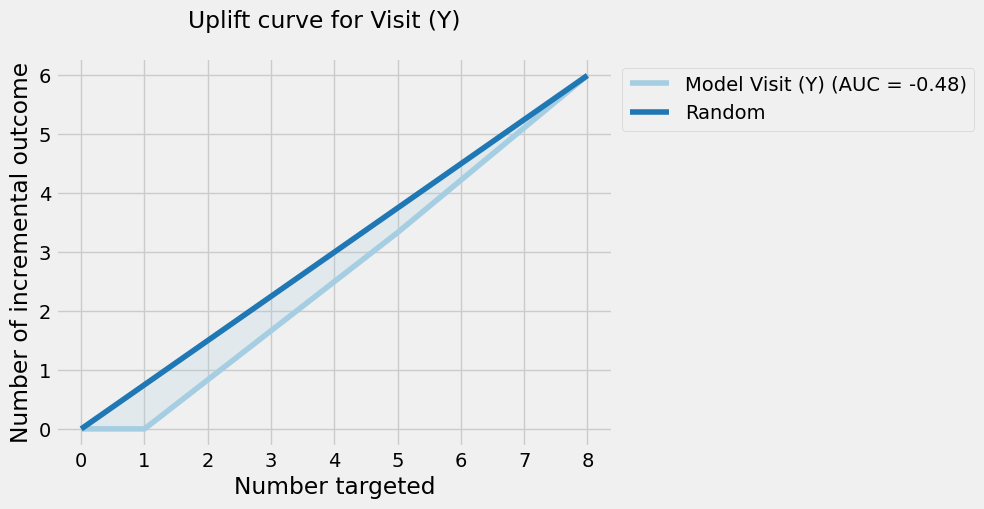

In [91]:
# Plotting uplift curves
from sklift.viz import plot_uplift_curve
uplift_disp_visit = plot_uplift_curve(data['outcome'], data['uplift_score'],data['treatment'], perfect=False, name='Model Visit (Y)')
uplift_disp_visit.figure_.suptitle("Uplift curve for Visit (Y)")
#plt.show()

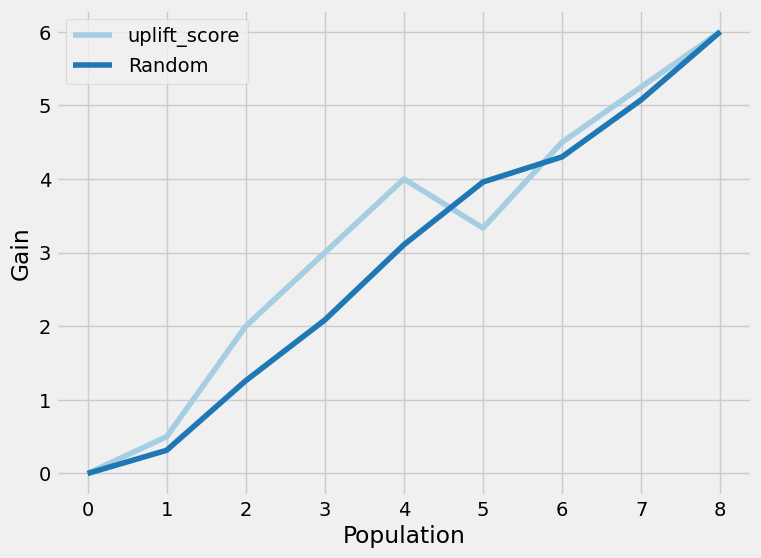

In [92]:
from causalml.metrics import plot_gain

# Plot Uplift Curve
plot_gain(
    df, 
    outcome_col='outcome', 
    treatment_col='treatment', 
    #treatment_effect_col='uplift_score',
    normalize=False,
    figsize=(8,6)
)
#plt.title('Uplift Curve')
#plt.show()